In [1]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

redownload = False

fp = '../data/nexsci_ps.csv'
if redownload:
    #pstable combines data from the Confirmed Planets and Extended Planet Parameters tables
#     tab = NasaExoplanetArchive.query_criteria(table="pscomppars", 
#                                              where="discoverymethod like 'Transit'"
#                                             ) 
    df = tab.to_pandas()
    df.to_csv(fp, index=True)
else:
    df = pd.read_csv(fp, index_col=0)
    df.index.name = 'index'
df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
0,Kepler-276 c,c,Kepler-276,NaN,NaN,TIC 138213510,2014-02,2013,Transit,Space,...,7.99553,0.051581,-0.051581,7.9955300&plusmn;0.0515805,0.310575,-0.711954,0.629813,1302657699,293.568197,39.036312
1,Kepler-829 b,b,Kepler-829,NaN,NaN,TIC 123451768,2016-05,2016,Transit,Space,...,7.93777,0.040833,-0.040833,7.9377700&plusmn;0.0408326,0.157566,-0.720680,0.675124,-792260935,282.332831,42.463813
2,K2-283 b,b,K2-283,NaN,NaN,TIC 266017624,2018-12,2018,Transit,Space,...,-10.97340,0.053624,-0.053624,-10.9734000&plusmn;0.0536244,0.959702,0.224997,0.168368,609813555,13.194368,9.692918
3,Kepler-477 b,b,Kepler-477,NaN,NaN,TIC 158633329,2016-05,2016,Transit,Space,...,-26.00000,NaN,NaN,-26.0,0.229185,-0.702544,0.673726,-1968935374,288.067445,42.355305
4,Qatar-7 b,b,Qatar-7,NaN,NaN,TIC 291685334,2019-02,2019,Transit,Ground,...,-5.18865,0.049700,-0.049700,-5.1886500&plusmn;0.0496999,0.798138,-0.020689,0.602119,1756763276,358.515134,37.021824


In [2]:
import astropy.units as u

df['pl_rade'] = df['pl_radj']*u.Rjup.to(u.Rearth)
transit = df.query("discoverymethod=='Transit'")

idx = (transit.pl_orbper>0) & (transit.pl_rade>0) & (transit.st_mass>0)
transit = transit[idx]

In [3]:
df[(df.st_age<0.1) & (df.st_ageerr1<0.5)]

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
6,TOI-942 b,b,TOI-942,NaN,NaN,TIC 146520535,2021-01,2020,Transit,Space,...,15.38190,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613
564,HIP 67522 b,b,HIP 67522,HD 120411,HIP 67522,TIC 166527623,2020-07,2020,Transit,Space,...,-28.84260,0.107772,-0.107772,-28.842600&plusmn;0.107772,-0.670941,-0.349657,-0.653895,-193571194,207.526001,-40.835896
1337,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,2019-08,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1352,V1298 Tau e,e,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1354,V1298 Tau d,d,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,5.22793,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032
1599,DS Tuc A b,b,DS Tuc A,HD 222259 A,HIP 116748 A,TIC 410214986,2019-07,2019,Transit,Space,...,79.46390,0.073634,-0.073634,79.4639000&plusmn;0.0736336,0.353774,-0.031477,-0.934801,430226194,354.915467,-69.196043
1971,Kepler-1643 b,b,Kepler-1643,NaN,NaN,TIC 239307743,2016-05,2016,Transit,Space,...,3.13804,0.037541,-0.037541,3.1380400&plusmn;0.0375414,0.359703,-0.612339,0.704027,-1187743939,300.431008,44.751013
1972,KOI-7368 b,b,KOI-7368,NaN,NaN,TIC 27010191,2022-05,2022,Transit,Space,...,2.84572,0.040640,-0.040640,2.8457200&plusmn;0.0406398,0.271257,-0.610756,0.743906,-1628401337,293.947636,48.065259
1973,KOI-7913 b,b,KOI-7913 A,NaN,NaN,TIC 158320130,2022-05,2022,Transit,Space,...,2.49304,0.030741,-0.030741,2.4930400&plusmn;0.0307412,0.203203,-0.675232,0.709063,-1931841691,286.748525,45.158723


In [4]:
age = pd.Series({'V1298 Tau': 0.023, #'K2-309'
                 'HIP 67522': 0.017, #Rizzuto+20 #HD 120411
                 'Au Mic': 0.022, #Plavchan+19,Klein+20
                 'K2-25': 0.700, #Mann+2016a, David+2016 in Hyades
                 'K2-33': 0.010, #in U.Sco.
#                 'K2-77': 1.3, #interloper
                 'K2-95': 0.700, #in Praesepe
                 'K2-100': 0.700, 'K2-101': 0.700, 'K2-102': 0.700, 'K2-103': 0.700, 'K2-104': 0.700, #in Praesepe
                 'K2-136': 0.700, #in Hyades
                 'K2-264': 0.700, #in Praesepe
                 'K2-284': 0.120, #field, may be Cas-Tau
                 'DS Tuc A': 0.045, #'TOI-200' in Tuc
                 'TOI-251': 0.180, #field, Zhou+2020
                 'TOI-451': 0.120, #in Psc-Eri, Newton+2021
                 'TOI-837': 0.035, #in IC 2602
                 'TOI-942': 0.090, #20-160, Zhou+2020, Carleo+2020b
                 'TOI-1097': 0.030, #in Melange-4, Wood+2023
                 'TOI-1098': 0.250, #Tofflemire+2022, 'HD 110082'
                 'TOI-1136': 0.7, #Dai+22
                 'TOI-1227': 0.011, #in LCC
                 'TOI-1268': 0.3, # field, Dong+22, Subjak+22
                 'TOI-1726': 0.410, #Ursa Major, Mann+2020, 'HD 63433'
                 'TOI-1807': 0.180, #Hedges+22, Nardiello+22
                 'TOI-2048': 0.3, #in Group X, Newton+2022b
                 'TOI-2076': 0.4, #Hedges+21, Osborn, Frazier+22
#                  'TOI-2336': 0.5, #Lin
                 'TOI-4399': 0.1, #Zhou+22
#                  'HD 114082': 0.017, #Vanderburg+                 
                 'Kepler-970': 0.100, #Barber+2022
                 'Kepler-1928': 0.100, #Barber+2022, KOI-3876
                 'Kepler-1627A': 0.038, #Bouma+2022
                 'Kepler-1643': 0.045, #Bouma+2022b
                 'KOI-7368': 0.035, #Bouma+2022b
                 'KOI-7913': 0.045, #Bouma+2022b
#                  'Qatar-4': 0.170, #Alsubai+2017
#                  'Kepler-66': 0.863, 'Kepler-67': 0.863, #Meibom+2013
#                  'OGLE2-TR-L9': 0.600, #Snellen                
                 #non-transiting
                 #'V830 Tau': 2,
                 #'TAP 26': 17,
                }, name='st_age')
age

V1298 Tau       0.023
HIP 67522       0.017
Au Mic          0.022
K2-25           0.700
K2-33           0.010
K2-95           0.700
K2-100          0.700
K2-101          0.700
K2-102          0.700
K2-103          0.700
K2-104          0.700
K2-136          0.700
K2-264          0.700
K2-284          0.120
DS Tuc A        0.045
TOI-251         0.180
TOI-451         0.120
TOI-837         0.035
TOI-942         0.090
TOI-1097        0.030
TOI-1098        0.250
TOI-1136        0.700
TOI-1227        0.011
TOI-1268        0.300
TOI-1726        0.410
TOI-1807        0.180
TOI-2048        0.300
TOI-2076        0.400
TOI-4399        0.100
Kepler-970      0.100
Kepler-1928     0.100
Kepler-1627A    0.038
Kepler-1643     0.045
KOI-7368        0.035
KOI-7913        0.045
Name: st_age, dtype: float64

In [5]:
names = age.index.tolist()
df2 = pd.merge(df, age, left_on='hostname', left_index=False, right_index=True)
idx = df2['hostname'].isin(names)
df2[idx]

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec,st_age_y
index,,,,,,,,,,,,,,,,,,,,,
6,TOI-942 b,b,TOI-942,NaN,NaN,TIC 146520535,2021-01,2020,Transit,Space,...,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613,0.090
2434,TOI-942 c,c,TOI-942,NaN,NaN,TIC 146520535,2021-01,2020,Transit,Space,...,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613,0.090
110,TOI-2076 b,b,TOI-2076,NaN,NaN,TIC 27491137,2021-08,2021,Transit,Space,...,0.036076,-0.036076,-118.2280000&plusmn;0.0360755,-0.610486,-0.466617,0.639981,655596192,217.392016,39.790399,0.400
111,TOI-2076 c,c,TOI-2076,NaN,NaN,TIC 27491137,2021-08,2021,Transit,Space,...,0.036076,-0.036076,-118.2280000&plusmn;0.0360755,-0.610486,-0.466617,0.639981,655596192,217.392016,39.790399,0.400
112,TOI-2076 d,d,TOI-2076,NaN,NaN,TIC 27491137,2021-08,2021,Transit,Space,...,0.036076,-0.036076,-118.2280000&plusmn;0.0360755,-0.610486,-0.466617,0.639981,655596192,217.392016,39.790399,0.400
155,TOI-1807 b,b,TOI-1807,NaN,NaN,TIC 180695581,2021-08,2021,Transit,Space,...,0.026905,-0.026905,-124.7130000&plusmn;0.0269051,-0.724940,-0.282389,0.628267,2100905569,201.282626,38.922367,0.180
564,HIP 67522 b,b,HIP 67522,HD 120411,HIP 67522,TIC 166527623,2020-07,2020,Transit,Space,...,0.107772,-0.107772,-28.842600&plusmn;0.107772,-0.670941,-0.349657,-0.653895,-193571194,207.526001,-40.835896,0.017
572,K2-25 b,b,K2-25,NaN,NaN,TIC 434226736,2016-02,2015,Transit,Space,...,0.222611,-0.222611,122.148000&plusmn;0.222611,0.433894,0.861726,0.262993,1465639053,63.273935,15.247703,0.700
1113,K2-100 b,b,K2-100,NaN,NaN,TIC 307733361,2017-02,2016,Transit,Space,...,0.108151,-0.108151,-36.144200&plusmn;0.108151,-0.598592,0.723545,0.343758,-2005768867,129.601086,20.106007,0.700


In [6]:
df2[['hostname','st_age_x','st_age_y']]

,hostname,st_age_x,st_age_y
index,,,
6,TOI-942,0.090,0.090
2434,TOI-942,0.090,0.090
110,TOI-2076,0.340,0.400
111,TOI-2076,0.340,0.400
112,TOI-2076,0.340,0.400
155,TOI-1807,0.180,0.180
564,HIP 67522,0.017,0.017
572,K2-25,0.730,0.700
1113,K2-100,0.750,0.700


In [7]:
young_stars=df2[df2.st_age_y<0.100]
young_stars

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec,st_age_y
index,,,,,,,,,,,,,,,,,,,,,
6,TOI-942 b,b,TOI-942,NaN,NaN,TIC 146520535,2021-01,2020,Transit,Space,...,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613,0.090
2434,TOI-942 c,c,TOI-942,NaN,NaN,TIC 146520535,2021-01,2020,Transit,Space,...,0.034048,-0.034048,15.3819000&plusmn;0.0340479,0.216640,0.912864,-0.346045,-510592518,76.649617,-20.245613,0.090
564,HIP 67522 b,b,HIP 67522,HD 120411,HIP 67522,TIC 166527623,2020-07,2020,Transit,Space,...,0.107772,-0.107772,-28.842600&plusmn;0.107772,-0.670941,-0.349657,-0.653895,-193571194,207.526001,-40.835896,0.017
1337,V1298 Tau b,b,V1298 Tau,NaN,NaN,TIC 15756231,2019-08,2019,Transit,Space,...,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032,0.023
1352,V1298 Tau e,e,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032,0.023
1354,V1298 Tau d,d,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032,0.023
2716,V1298 Tau c,c,V1298 Tau,NaN,NaN,TIC 15756231,2019-11,2019,Transit,Space,...,0.130671,-0.130671,5.227930&plusmn;0.130671,0.450356,0.823671,0.344594,-403262256,61.331654,20.157032,0.023
1599,DS Tuc A b,b,DS Tuc A,HD 222259 A,HIP 116748 A,TIC 410214986,2019-07,2019,Transit,Space,...,0.073634,-0.073634,79.4639000&plusmn;0.0736336,0.353774,-0.031477,-0.934801,430226194,354.915467,-69.196043,0.045
1971,Kepler-1643 b,b,Kepler-1643,NaN,NaN,TIC 239307743,2016-05,2016,Transit,Space,...,0.037541,-0.037541,3.1380400&plusmn;0.0375414,0.359703,-0.612339,0.704027,-1187743939,300.431008,44.751013,0.045


## Neptune desert

In [8]:
from uncertainties import ufloat

def upper_boundary(period, method='stripe'):
    if method=='stripe':
        return -0.33*period+1.17
    elif method=='likelihood':
        a=ufloat(0.31,0.12)
        b=ufloat(1.19,0.06)
        return -a*period+b
    
def lower_boundary(period, method='stripe'):
    if method=='stripe':
        return 0.68*period
    elif method=='likelihood':
        a=ufloat(0.67,0.06)
        b=ufloat(0.01,0.04)
        return a*period-b

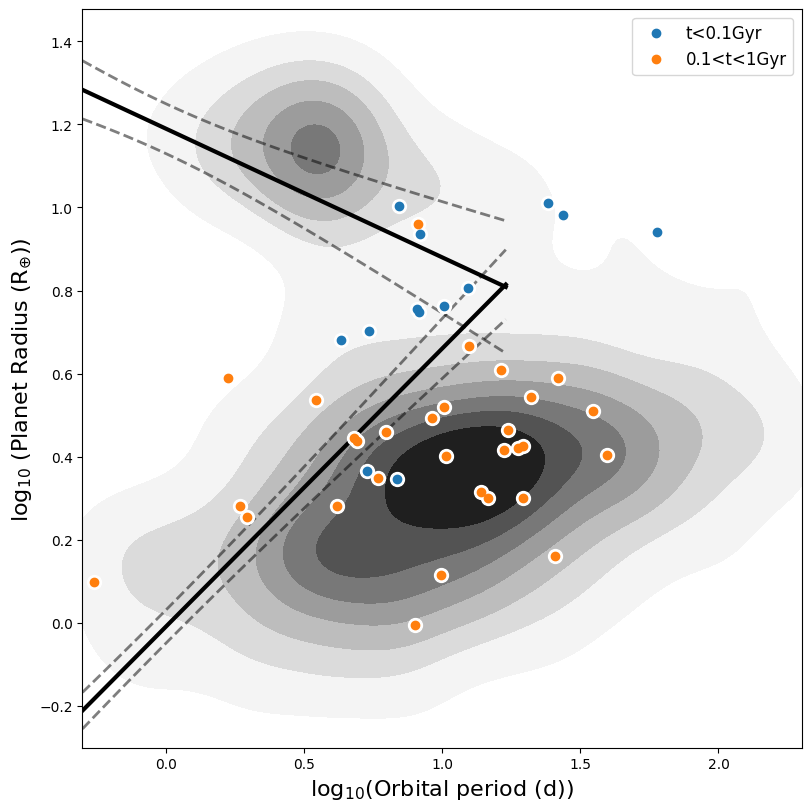

In [9]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as pl
import seaborn as sb

plot_contours = True

fig, ax = pl.subplots(figsize=(8,8), constrained_layout=True)

porb_lims = (0.5,200)
rp_lims = (0.5,30)

x,y = 'pl_orbper', 'pl_rade'
idx = (df[x]>porb_lims[0]) & (df[x]<porb_lims[1]) & (df[y]>rp_lims[0]) & (df[y]<rp_lims[1])
#idx = (df[x]>0.1) & (df[x]<2) & (df[y]>1) & (df[y]<30)

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=np.log10(df.loc[idx,x]),
                   y=np.log10(df.loc[idx,y]),
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, zorder=0)
    
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color,lbl=('C0','t<0.1Gyr') if young_stars.hostname.isin([n]).any() else ('C1','0.1<t<1Gyr')
    
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=11)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=10)
    
ax.set_xlim(*np.log10(porb_lims))
ax.set_ylim(*np.log10(rp_lims))
ax.set_ylabel('$\log_{10}$ (Planet Radius ('+r'R$_{\oplus}$))', fontsize=16)
ax.set_xlabel('$\log_{10}$(Orbital period (d))', fontsize=16)
    
xmin,xmax=np.log10(0.5),np.log10(17) #day
xx=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(xx,method=method)]
ys1=[i.s for i in upper_boundary(xx,method=method)]

y2=[i.n for i in lower_boundary(xx,method=method)]
ys2=[i.s for i in lower_boundary(xx,method=method)]

zorder = 2

#upper boundary
ax.plot(xx,y1,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
#lower boundary
ax.plot(xx,y2,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)

# fix legend
handles, labels = pl.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg = ax.legend(by_label.values(), by_label.keys(),loc='upper right', fontsize=12)
# for lh in leg.legendHandles: 
#     lh._legmarker.set_alpha(1)

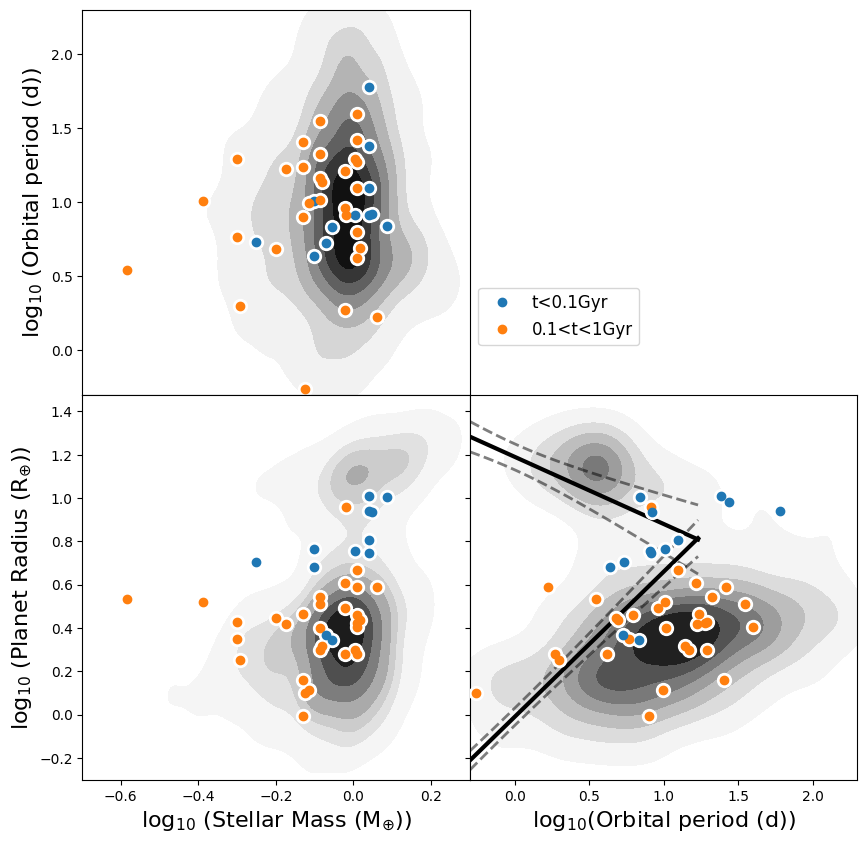

In [10]:
plot_contours = True

fig, axs = pl.subplots(2,2, 
                       figsize=(10,10), 
                       sharey='row', sharex='col',
                       constrained_layout=False,
                      )
porb_lims = (0.5,200)
rp_lims = (0.5,30)
mstar_lims = (0.2,2)

axs = axs.flatten()
axs[1].set_axis_off()

# =============================== mass vs period
ax = axs[0]
x,y = 'st_mass', 'pl_orbper'
idx = (df[x]>mstar_lims[0]) & (df[x]<mstar_lims[1]) & (df[y]>porb_lims[0]) & (df[y]<porb_lims[1])

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

# field stars
if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=np.log10(df.loc[idx,x]), 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, zorder=0)
        
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color='C0' if young_stars.hostname.isin([n]).any() else 'C1'
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=1)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=0)

ax.set_xlim(*np.log10((mstar_lims)))
ax.set_ylim(*np.log10(porb_lims))
ax.set_ylabel('$\log_{10}$ (Orbital period (d))', fontsize=16)

# =============================== mass vs radius
ax = axs[2]
x,y = 'st_mass', 'pl_rade'

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

# field stars
if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=np.log10(df.loc[idx,x]), 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    idx = (df[x]>mstar_lims[0]) & (df[x]<mstar_lims[1]) & (df[y]>rp_lims[0]) & (df[y]<rp_lims[1])
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, label='t>1Gyr', zorder=0)
    
# young stars
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color,lbl=('C0','t<0.1Gyr') if young_stars.hostname.isin([n]).any() else ('C1','0.1<t<1Gyr')
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=11)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=10)
    
#fix legends
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg = ax.legend(by_label.values(), by_label.keys(),
                loc='upper left', 
                bbox_to_anchor=(1.0, 1.3), #quadrant 2
                fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    
ax.set_xlim(*np.log10(mstar_lims))
ax.set_ylim(*np.log10(rp_lims))
ax.set_ylabel('$\log_{10}$ (Planet Radius ('+r'R$_{\oplus}$))', fontsize=16)
ax.set_xlabel('$\log_{10}$ (Stellar Mass ('+r'M$_{\oplus}$))', fontsize=16)


# =============================== period vs radius
# Neptune desert boundary should be in log10 space

ax = axs[3]
x,y = 'pl_orbper', 'pl_rade'

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=np.log10(df.loc[idx,x]), 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    idx = (df[x]>porb_lims[0]) & (df[x]<porb_lims[1]) & (df[y]>rp_lims[0]) & (df[y]<rp_lims[1])
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, zorder=0)
    
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color='C0' if young_stars.hostname.isin([n]).any() else 'C1'
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=11)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=10)
    
ax.set_xlim(*np.log10(porb_lims))
ax.set_ylim(*np.log10(rp_lims))
ax.set_xlabel('$\log_{10}$(Orbital period (d))', fontsize=16)

xmin,xmax=np.log10(0.5),np.log10(17) #day
xx=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(xx,method=method)]
ys1=[i.s for i in upper_boundary(xx,method=method)]

y2=[i.n for i in lower_boundary(xx,method=method)]
ys2=[i.s for i in lower_boundary(xx,method=method)]

zorder = 2

#upper boundary
ax.plot(xx,y1,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
#lower boundary
ax.plot(xx,y2,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

/home/jp/miniconda3/envs/wakai/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jp/miniconda3/envs/wakai/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jp/miniconda3/envs/wakai/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jp/miniconda3/envs/wakai/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_19221/2050480746.py:44: RuntimeWarning: invalid value encountered in log10
  ax.plot(np.log10(d[x]),
/tmp/ipykernel_19221/2050480746.py:48: RuntimeWarning: invalid value encountered in log10
  ax.plot(np.log10(d[x

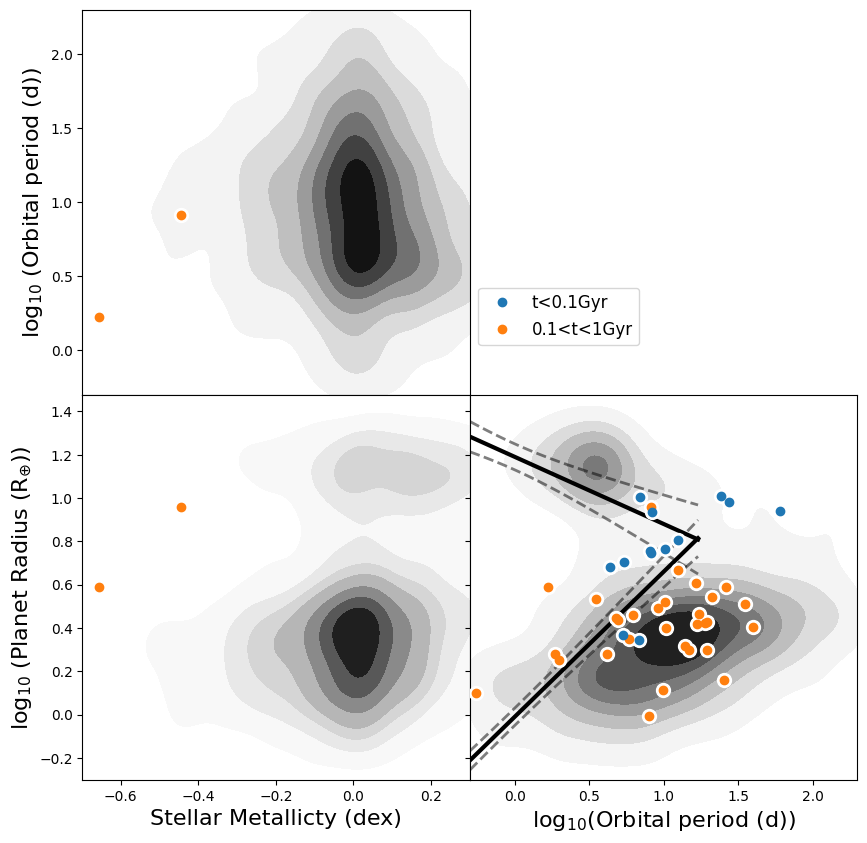

In [11]:
plot_contours = True

fig, axs = pl.subplots(2,2, 
                       figsize=(10,10), 
                       sharey='row', sharex='col',
                       constrained_layout=False,
                      )
porb_lims = (0.5,200)
rp_lims = (0.5,30)
feh_lims = (-1,1)

axs = axs.flatten()
axs[1].set_axis_off()

# =============================== mass vs period
ax = axs[0]
x,y = 'st_met', 'pl_orbper'
idx = (df[x]>feh_lims[0]) & (df[x]<feh_lims[1]) & (df[y]>porb_lims[0]) & (df[y]<porb_lims[1])

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

# field stars
if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=df.loc[idx,x], 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, zorder=0)
        
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color='C0' if young_stars.hostname.isin([n]).any() else 'C1'
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=1)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=0)

ax.set_xlim(*np.log10((mstar_lims)))
ax.set_ylim(*np.log10(porb_lims))
ax.set_ylabel('$\log_{10}$ (Orbital period (d))', fontsize=16)

# =============================== mass vs radius
ax = axs[2]
x,y = 'st_met', 'pl_rade'

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

# field stars
if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=df.loc[idx,x], 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    idx = (df[x]>mstar_lims[0]) & (df[x]<mstar_lims[1]) & (df[y]>rp_lims[0]) & (df[y]<rp_lims[1])
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, label='t>1Gyr', zorder=0)
    
# young stars
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color,lbl=('C0','t<0.1Gyr') if young_stars.hostname.isin([n]).any() else ('C1','0.1<t<1Gyr')
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=11)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=10)
    
#fix legends
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
leg = ax.legend(by_label.values(), by_label.keys(),
                loc='upper left', 
                bbox_to_anchor=(1.0, 1.3), #quadrant 2
                fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    
ax.set_xlim(*np.log10(mstar_lims))
ax.set_ylim(*np.log10(rp_lims))
ax.set_ylabel('$\log_{10}$ (Planet Radius ('+r'R$_{\oplus}$))', fontsize=16)
ax.set_xlabel('Stellar Metallicty (dex)', fontsize=16)


# =============================== period vs radius
# Neptune desert boundary should be in log10 space

ax = axs[3]
x,y = 'pl_orbper', 'pl_rade'

#target
# ax.plot(np.log10(target[x]), 
#         np.log10(target[y]), 
#         'w*', ms=20, zorder=20, label='HD 18599', markeredgecolor='k')

if plot_contours:
    # gray contours
    _ = sb.kdeplot(x=np.log10(df.loc[idx,x]), 
                   y=np.log10(df.loc[idx,y]), 
                   cmap='gray_r', 
                   n_levels=8, 
                   log_scale=False, 
                   fill=True, 
                   ax=ax, 
                   zorder=-1)
else:
    idx = (df[x]>porb_lims[0]) & (df[x]<porb_lims[1]) & (df[y]>rp_lims[0]) & (df[y]<rp_lims[1])
    ax.plot(np.log10(df.loc[idx,x]), 
            np.log10(df.loc[idx,y]), 
            '.', c='C7', alpha=0.1, zorder=0)
    
for n in df2.hostname.unique():
    d = df2[df2.hostname==n].squeeze()
    color='C0' if young_stars.hostname.isin([n]).any() else 'C1'
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c=color, label=lbl, zorder=11)
    #white outline
    ax.plot(np.log10(d[x]), 
            np.log10(d[y]), 
            'o', c='w', label='_nolegend_', ms=10, zorder=10)
    
ax.set_xlim(*np.log10(porb_lims))
ax.set_ylim(*np.log10(rp_lims))
ax.set_xlabel('$\log_{10}$(Orbital period (d))', fontsize=16)

xmin,xmax=np.log10(0.5),np.log10(17) #day
xx=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(xx,method=method)]
ys1=[i.s for i in upper_boundary(xx,method=method)]

y2=[i.n for i in lower_boundary(xx,method=method)]
ys2=[i.s for i in lower_boundary(xx,method=method)]

zorder = 2

#upper boundary
ax.plot(xx,y1,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y1,ys1),'k--',lw=2,zorder=zorder,alpha=0.5)
#lower boundary
ax.plot(xx,y2,'k-',lw=3,zorder=zorder)
ax.plot(xx,np.add(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)
ax.plot(xx,np.subtract(y2,ys2),'k--',lw=2,zorder=zorder,alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

In [12]:
idx = ['st_logg', 'st_dens', 'st_rad', 'st_mass', 'st_met', 'st_rotp', 'st_teff',
       'pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_eqt'
      ]
df2[idx]

,st_logg,st_dens,st_rad,st_mass,st_met,st_rotp,st_teff,pl_rade,pl_bmasse,pl_orbper,pl_eqt
index,,,,,,,,,,,
6,4.31,1.63400,1.02,0.79,-0.221,3.40,4928.00,4.808653,826.358,4.324190,1120.000000
2434,4.31,1.63400,1.02,0.79,-0.221,3.40,4928.00,5.795043,794.575,10.156430,NaN
110,4.45,2.24400,0.77,0.82,-0.090,6.84,5200.00,2.522021,6.890,10.355090,797.000000
111,4.45,2.24400,0.77,0.82,-0.090,6.84,5200.00,3.497202,12.000,21.015380,629.500000
112,4.45,2.24400,0.77,0.82,-0.090,6.84,5200.00,3.228186,10.500,35.125370,530.400000
155,4.65,3.37400,0.68,0.75,-0.029,8.80,4757.00,1.255406,2.570,0.549372,2100.000000
564,4.20,0.65000,1.38,1.22,0.000,1.42,5675.00,10.065665,72.400,6.959503,1174.000000
572,4.94,14.60000,0.29,0.26,0.150,1.88,3207.00,3.429948,24.500,3.484564,494.000000
1113,4.33,0.85000,1.24,1.15,0.220,4.30,5945.00,3.878307,21.800,1.673903,1841.000000


In [13]:
ax.plot(np.log10(d[x]), 
                    np.log10(d[y]), 
                    'o', c='w', label='_nolegend_', ms=10, zorder=10)     

In [50]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

Noutliers: 197 (contamination=0.05)
Noutliers: 99 (contamination=0.03)
Noutliers: 50 (contamination=0.01)
Noutliers: 25 (contamination=0.01)
Noutliers: 13 (contamination=0.00)
Noutliers: 7 (contamination=0.00)


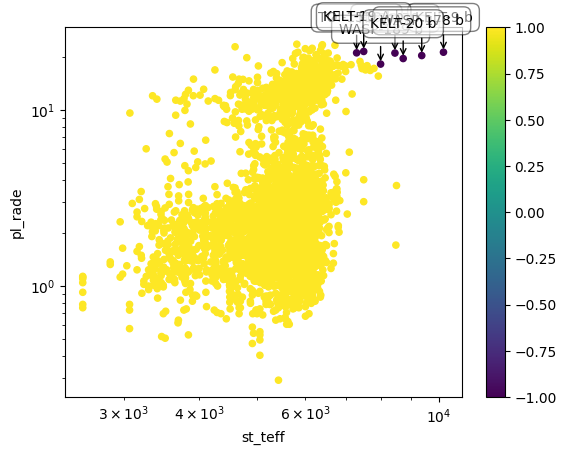

In [64]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from adjustText import adjust_text

x, y = 'st_teff', 'pl_rade'

# Set the minimum number of outliers
min_outliers = 10

# Set the initial contamination value
contamination = 0.1

# Define the data for the first scatter plot
data = df[[x,y,'pl_name']].dropna()
X = data[[x,y]].values

# Create the IsolationForest model and fit it to the data from both scatter plots
model = IsolationForest(contamination=contamination, random_state=0)
model.fit(X)
predictions = model.predict(X)
outliers = data[predictions == -1]

# Keep increasing the contamination value until the number of outliers is less than min_outliers
while len(outliers) >= min_outliers:
    contamination *= 0.5
    model.set_params(contamination=contamination)
    model.fit(X)
    predictions = model.predict(X)
    outliers = data[predictions == -1]
    print(f"Noutliers: {len(outliers)} (contamination={contamination:.2f})")

# Create the first scatter plot
fig, ax = plt.subplots()
data.plot.scatter(x, y, c=predictions, ax=ax, cmap='viridis', 
                                logy=True, logx=True)

for i,o in outliers.iterrows():
    if young_stars.pl_name.isin([o.pl_name]).any():
                fc='yellow'
    else:
        fc='white'
    ax.annotate(o.pl_name, 
                xy=o[[x,y]], xytext=(0, 20), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.5), 
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
               )
    
# text_list = [outliers.hostname.values]
# xx,yy = outliers[[x,y]].values.T
# texts = [pl.text(xx[i], yy[i], 'Text%s' %i, ha='center', va='center') for i in range(len(outliers))]
# adjust_text(texts)

In [77]:
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from adjustText import adjust_text

# Set the minimum number of outliers
min_outliers = 10

# Set the initial contamination value
contamination = 0.01

params = ['st_logg', 'st_dens', 'st_rad', 'st_mass', 'st_met', 'st_rotp', 'st_teff',
       'pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_eqt'
      ]
cols = df[params].columns
for i,(x,y) in enumerate(combinations(cols, 2)):
    ax = df.plot.scatter(x, y, c='k', marker='.', alpha=0.3, logx=True, logy=True)
    #plot age<1Gyr
    for hostname in df2.hostname.unique():
        d = df2[df2.hostname==hostname].squeeze()
        color,lbl=('C0','t<0.1Gyr') if young_stars.hostname.isin([hostname]).any() else ('C1','0.1<t<1Gyr')
        ax.plot(d[x], d[y], 'o', c=color, label=lbl, zorder=11)
        #white outline
        ax.plot(d[x], d[y], 'o', c='w', label='_nolegend_', ms=10, zorder=10)
        
    handles, labels = pl.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    leg = ax.legend(by_label.values(), by_label.keys(),loc='best', fontsize=12)
    
    try:
        # Define the data for the first scatter plot
        data = df[[x,y,'pl_name']].dropna()
        X = data[[x,y]].values

        # Create the IsolationForest model and fit it to the data from both scatter plots
        model = IsolationForest(contamination=contamination, random_state=0)
        model.fit(X)
        predictions = model.predict(X)
        outliers = data[predictions == -1]

        # Keep increasing the contamination value until the number of outliers is less than min_outliers
        while len(outliers) >= min_outliers:
            #halve the contamination
            contamination *= 0.5
            model.set_params(contamination=contamination)
            model.fit(X)
            predictions = model.predict(X)
            outliers = data[predictions == -1]
            print(f"Noutliers: {len(outliers)} (contamination={contamination:.2f})")
    
        for j,o in outliers.iterrows():
            if young_stars.pl_name.isin([o.pl_name]).any():
                        fc='yellow'
            else:
                fc='white'
            ax.annotate(o.pl_name, 
                        xy=o[[x,y]], xytext=(0, 20), 
                        textcoords='offset points', 
                        ha='center', va='bottom', 
                        bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.5), 
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
                       )

        # text_list = [outliers.hostname.values]
        # xx,yy = outliers[[x,y]].values.T
        # texts = [pl.text(xx[i], yy[i], 'Text%s' %i, ha='center', va='center') for i in range(len(outliers))]
        # adjust_text(texts)
    except Exception as e:
        print(e)
    try:
        ax.figure.savefig(f"../figures/tmp/fig{i}.png", bbox_inches="tight")
    except Exception as e:
        print(e)
    pl.close()

Noutliers: 19 (contamination=0.01)
Noutliers: 10 (contamination=0.00)
Noutliers: 0 (contamination=0.00)
Image size of 603x232154 pixels is too large. It must be less than 2^16 in each direction.
Image size of 578x232154 pixels is too large. It must be less than 2^16 in each direction.
Image size of 592x232163 pixels is too large. It must be less than 2^16 in each direction.
Image size of 311599x437 pixels is too large. It must be less than 2^16 in each direction.
Image size of 311585x455 pixels is too large. It must be less than 2^16 in each direction.
Image size of 311610x462 pixels is too large. It must be less than 2^16 in each direction.
Image size of 311584x462 pixels is too large. It must be less than 2^16 in each direction.


## two populations

In [ ]:
from itertools import combinations
from sklearn.ensemble import IsolationForest

params = ['st_logg', 'st_dens', 'st_rad', 'st_mass', 'st_met', 'st_rotp', 'st_teff',
       'pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_eqt'
      ]
cols = df[params].columns
for i,(x,y) in enumerate(combinations(cols, 2)):
    ax=df.plot.scatter(x,y,c='k',marker='.',alpha=0.3, logx=True, logy=True)
    #plot age<1Gyr
    for n in df2.hostname.unique():
        d = df2[df2.hostname==n].squeeze()
        color,lbl=('C0','t<0.1Gyr') if young_stars.hostname.isin([n]).any() else ('C1','0.1<t<1Gyr')
        ax.plot(d[x], d[y], 'o', c=color, label=lbl, zorder=11)
        #white outline
        ax.plot(d[x], d[y], 'o', c='w', label='_nolegend_', ms=10, zorder=10)
        
    handles, labels = pl.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    leg = ax.legend(by_label.values(), by_label.keys(),loc='best', fontsize=12)
    
    try:
        # Create the IsolationForest model and fit it to the data from both scatter plots
        X1 = df[[x,y]].dropna().values
        X2 = young_stars[[x,y]].dropna().values
        model = IsolationForest(contamination=0.01, random_state=0)
        model.fit(np.vstack((X1, X2)))

        # Use the model to predict which points are outliers in both scatter plots
        outliers1 = model.predict(X1)
        outliers2 = model.predict(X2)

        #annotate outliers in young systems
#         idx=[True if i==-1 else False for i in outliers2]
#         outliers = young_stars[[x,y,'pl_name']].dropna()[idx]
        
        #annotate outliers in whole population
        outliers = df[[x,y,'pl_name']].dropna()[outliers1==-1]
        for j,o in outliers.iterrows():
            if young_stars.pl_name.isin([o.pl_name]).any():
                fc='yellow'
            else:
                fc='white'
            ax.annotate(o.pl_name, 
                        xy=o[[x,y]], 
                        xytext=(0, 20), 
                        textcoords='offset points', 
                        ha='center', va='bottom', 
                        bbox=dict(boxstyle='round,pad=0.5', fc=fc, alpha=0.5), 
                        arrowprops=dict(arrowstyle='->', color='k', zorder=13,
                                        connectionstyle='arc3,rad=0')
                       )
    except Exception as e:
        print(e)
#     try:
#         ax.figure.savefig(f"../figures/tmp/fig{i}.png", bbox_inches="tight")
#     except Exception as e:
#         print(e)
#     pl.close()